In [26]:
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Introduction
For weekly assignment 4 and 5, I selected the dataset 'Gender recognition of voice' including the variables meanfreq, sd, median, meanfun, minfun, maxfun, meandom, mindom, maxdom, dfrange, modindx, and label. I selected these varaibles because I think they give a broad insight in the mean, min, and max.   
I chose this dataset because I find it interesting to see the mean differences between female and male identified voices. 

In [39]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Describe any data cleaning steps

In [40]:
df = df.drop(columns=["Q25", "Q75", "IQR", "skew", "sp.ent", "kurt", "sfm", "centroid"])


In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   mode      3168 non-null   float64
 4   meanfun   3168 non-null   float64
 5   minfun    3168 non-null   float64
 6   maxfun    3168 non-null   float64
 7   meandom   3168 non-null   float64
 8   mindom    3168 non-null   float64
 9   maxdom    3168 non-null   float64
 10  dfrange   3168 non-null   float64
 11  modindx   3168 non-null   float64
 12  label     3168 non-null   object 
dtypes: float64(12), object(1)
memory usage: 321.9+ KB


Exploratory data analysis

In [42]:
df = df.dropna()
print(df)

      meanfreq        sd    median      mode   meanfun    minfun    maxfun  \
0     0.059781  0.064241  0.032027  0.000000  0.084279  0.015702  0.275862   
1     0.066009  0.067310  0.040229  0.000000  0.107937  0.015826  0.250000   
2     0.077316  0.083829  0.036718  0.000000  0.098706  0.015656  0.271186   
3     0.151228  0.072111  0.158011  0.083878  0.088965  0.017798  0.250000   
4     0.135120  0.079146  0.124656  0.104261  0.106398  0.016931  0.266667   
...        ...       ...       ...       ...       ...       ...       ...   
3163  0.131884  0.084734  0.153707  0.200836  0.182790  0.083770  0.262295   
3164  0.116221  0.089221  0.076758  0.013683  0.188980  0.034409  0.275862   
3165  0.142056  0.095798  0.183731  0.008006  0.209918  0.039506  0.275862   
3166  0.143659  0.090628  0.184976  0.212202  0.172375  0.034483  0.250000   
3167  0.165509  0.092884  0.183044  0.267702  0.185607  0.062257  0.271186   

       meandom    mindom    maxdom   dfrange   modindx   label 

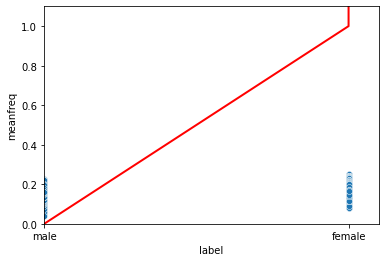

In [43]:
sns.scatterplot(x="label", y="meanfreq", data=df)
plt.xlim(0.0, 1.1)
plt.ylim(0.0, 1.1)
plt.plot([0, 1, 5e6], color="red", lw=2)
plt.xlabel("label")
plt.ylabel("meanfreq")
plt.show()

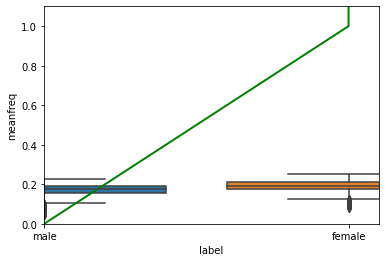

In [44]:
sns.boxplot(x="label", y="meanfreq", data=df)
plt.xlim(0.0, 1.1)
plt.ylim(0.0, 1.1)
plt.plot([0, 1, 5e6], color="green", lw=2)
plt.xlabel("label")
plt.ylabel("meanfreq")
plt.show()

Here I try to split the dataset into a trainging and test set

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, test_size=0.4, random_state=10)

ValueError: not enough values to unpack (expected 4, got 2)

In [47]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
prediction_test = reg.predict(X_test)

NameError: name 'linear_model' is not defined

In [46]:
from sklearn.preprocessing import normalize

X = df.loc[:, ~df.columns.isin(["meanfreq"])] #create the X matrix
y = df["meanfreq"] #create the y-variable

X = normalize(X) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
pd.DataFrame(X_train).head()

ValueError: could not convert string to float: 'male'

In [23]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier() #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data


NameError: name 'X_train' is not defined

KNN works by finding the distances between a query and all the examples in the data, it selects the specified number examples (K) closest to the query and then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

In [24]:
knn.score(X_test, y_test) #calculates the fit on the *test* data 

NameError: name 'X_test' is not defined